In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#### <font color = blue>Import the Dataset

In [ ]:
df = pd.read_csv("Dataset/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### <font color = blue>Data shape

In [ ]:
print("Number of columns:", df.shape[1])
print("Number of rows: ", df.shape[0])

Number of columns: 16
Number of rows:  730


#### <font color = blue>Data Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### <font color = blue>Data Description

In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### <font color = blue> Check the Correaltion of Features

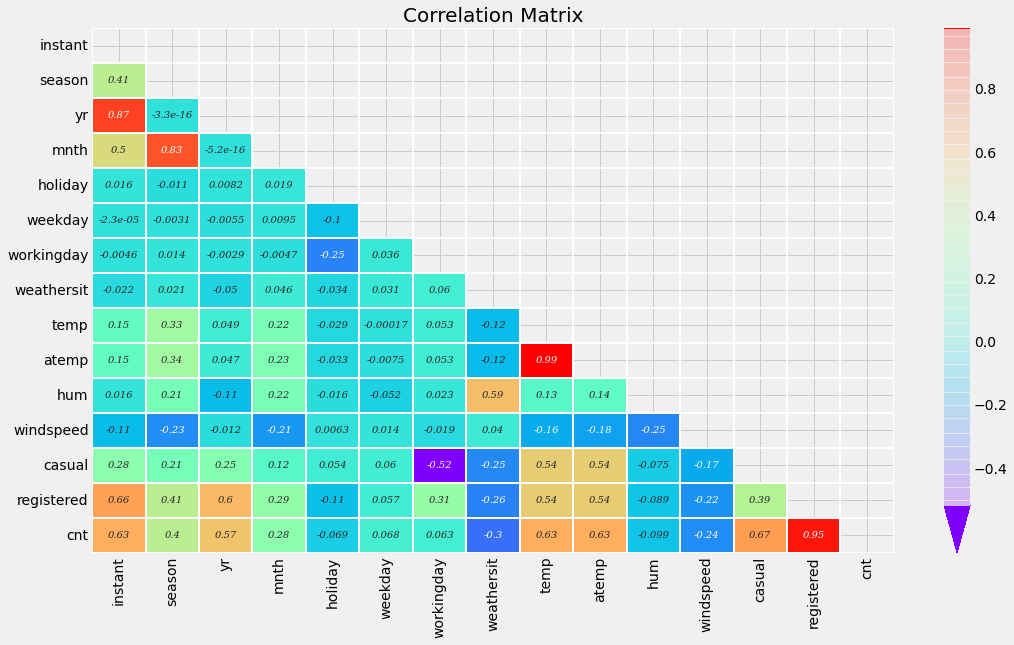

In [ ]:
# Define the figure size
plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(df.corr())

# Generate heatmap correlation
ax = sns.heatmap(df.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Matrix', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Check Missing Value </font>

In [ ]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

no missig value found

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Remove Unwanted Columns </font>

In [ ]:
df = df.drop(['instant', 'dteday'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### <font color = #27C3E5> 2.3: </font> <font color = #41EA46> Define Predictor and Target Attribute </font>

In [ ]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

#### <font color = blue> Predictor Attribute

In [ ]:
X.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518


#### <font color = blue> Target Attribute

In [ ]:
Y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

### <font color = #27C3E5> 2.5: </font> <font color = #41EA46> Split the Data into Train and Test </font>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### <font color = blue> Training Data

In [ ]:
print("X_test", X_train.shape)
print("X_test", y_train.shape)

X_test (584, 13)
X_test (584,)


#### <font color = blue> Testing Data

In [ ]:
print("X_test", X_test.shape)
print("X_test", y_test.shape)

X_test (146, 13)
X_test (146,)


### <font color = #27C3E5> 2.6: </font> <font color = #41EA46> Feature Scaling </font>

In [ ]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

pd.DataFrame(X_test).head()  # Same Scale

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.439227,-0.989778,0.129950,-0.167836,1.491381,-1.486200,-0.719250,1.058888,1.020640,-0.294204,0.237423,2.298627,-0.092996
1,0.439227,-0.989778,0.129950,-0.167836,0.491993,0.672857,-0.719250,1.403349,1.317666,0.178544,-0.403795,-0.134854,0.126157
2,-1.367170,-0.989778,-1.608006,-0.167836,1.491381,-1.486200,1.155938,-1.406745,-1.363429,-0.909667,-0.419936,-0.912866,-1.724467
3,-1.367170,-0.989778,-1.318347,-0.167836,-0.507395,0.672857,1.155938,-1.630605,-1.446424,1.450965,-1.786740,-1.168791,-1.535588
4,-1.367170,1.010327,-1.608006,-0.167836,0.491993,0.672857,1.155938,-0.817529,-0.703860,1.022945,-1.523390,-0.880692,0.121550


## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Build the Support Vector Regression </font>
In this part, we build the Support Vector Regression Model using Scikit-Learn

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### <font color = blue> Import Model from Sklearn

In [ ]:
from sklearn.svm import SVR,LinearSVR
# Use GridSearchCV to search for the best hyperparameters
from sklearn.model_selection import GridSearchCV


#### <font color = blue> Initialize the Model

In [ ]:

def experiment_model(X_train,y_train,X_test):

    result_list = []


    # Initialize the SVM with a rbf kernel
    svm_model = SVR(kernel='rbf')

    # Define the parameter grid for gamma and C
    param_grid = {"gamma": ["auto", "scale"], 'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
    clf_one = GridSearchCV(estimator=svm_model, param_grid=param_grid)
    clf_one.fit(X_train, y_train)
    Predicted_labels= clf_one.predict(X_test)
    result_list.append((Predicted_labels,clf_one))
    print(f"SVM , Kernal = RBF , Best parameters: {clf_one.best_params_}")



    print("SVM , Kernel = Linear ")
    param_grid = {'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
    svm_model = LinearSVR()
    clf_two = GridSearchCV(estimator=svm_model, param_grid=param_grid)
    clf_two.fit(X_train, y_train)
    Predicted_labels= clf_two.predict(X_test)
    result_list.append((Predicted_labels,clf_two))
    print(f"SVM , Kernal = Linear , Best parameters: {clf_two.best_params_}")




    #Initialize the SVM with a polynomial kernel
    param_grid = {"degree": [2, 3, 4],"C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
    svm_model = SVR(kernel='poly')
    clf_three = GridSearchCV(estimator=svm_model, param_grid=param_grid,cv=5)
    clf_three.fit(X_train, y_train)
    Predicted_labels= clf_three.predict(X_test)
    result_list.append((Predicted_labels,clf_three))
    print(f"SVM , Kernel = Poly , Best parameters: {clf_three.best_params_}")


    # Initialize the SVM with a Sigmoid kernel
    param_grid = {'gamma': [0.1, 1, 10], 'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
    svm_model = SVR(kernel='sigmoid')
    clf_four = GridSearchCV(estimator=svm_model, param_grid=param_grid,cv=5)
    clf_four.fit(X_train, y_train)
    Predicted_labels= clf_four.predict(X_test)
    result_list.append((Predicted_labels,clf_four))
    print(f"SVM , Kernel = Sigmoid , Best parameters: {clf_four.best_params_}")




    return result_list

#### <font color = blue> Fit the Model

In [ ]:
result = experiment_model(X_train, y_train,X_test)

SVM , Kernal = RBF , Best parameters: {'C': 1000, 'gamma': 'auto'}
SVM , Kernel = Linear 
SVM , Kernal = Linear , Best parameters: {'C': 1000}
SVM , Kernel = Poly , Best parameters: {'C': 1000, 'degree': 3}
SVM , Kernel = Sigmoid , Best parameters: {'C': 100, 'gamma': 0.1}


#### <font color = blue> Predict the Test Data</font>

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Evaluate the Result </font>
In this part, we evaluate the Decision Tree Regression Model. And for evaluation we will use three metrics. <br>
`R Square`: R Square measures how much variability in dependent variable can be explained by the model. <br>
`Mean Square Error`: MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives you an absolute number on how much your predicted results deviate from the actual number. <br>
`Mean Absolute Error`: Mean Absolute Error(MAE) is similar to Mean Square Error(MSE). However, instead of the sum of square of error in MSE, MAE is taking the sum of the absolute value of error.


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
def find_metic_for_reqerssion(y_true,y_pred,score,model_name):
    print(f"{model_name} :")
    print(f"score: {score}")
    print(f"MSE: {mean_squared_error(y_true, y_pred)}")
    print(f"RMSE: {math.sqrt(mean_squared_error(y_true, y_pred))}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred)}")

In [ ]:
find_metic_for_reqerssion(y_test,result[0][0],result[0][1].score(X_test,y_test),"RBF")

RBF :
score: 0.9652371853444817
MSE: 153903.90113095395
RMSE: 392.3058770028228
MAE: 186.62444251074908


In [ ]:
find_metic_for_reqerssion(y_test,result[1][0],result[1][1].score(X_test,y_test),"Linner")

Linner :
score: 0.9999999999778757
MSE: 9.795008403361586e-05
RMSE: 0.009896973478473904
MAE: 0.007657639315346088


In [ ]:
find_metic_for_reqerssion(y_test,result[2][0],result[2][1].score(X_test,y_test),"Poly")

Poly :
score: 0.8989604107161324
MSE: 447328.19000857405
RMSE: 668.8259788678771
MAE: 362.43799167683363


In [ ]:
find_metic_for_reqerssion(y_test,result[3][0],result[3][1].score(X_test,y_test),"Sigmoid")

Sigmoid :
score: 0.9227324958889135
MSE: 342083.06868099066
RMSE: 584.8786786000928
MAE: 404.5202923827171


![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 4.1: </font> <font color = #41EA46>  Show correlation of Results  And True value
 </font>

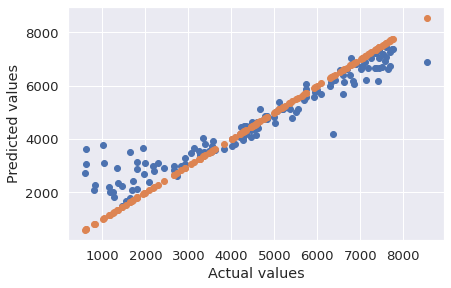

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions


# Fit the SVR model with RBF kernels
rbf = SVR(kernel='rbf',C=100,gamma='scale').fit(X_train,y_train)

# Plot the actual target values against the predicted values
plt.scatter(y_test, rbf.predict(X_test))
plt.scatter(y_test,y_test)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

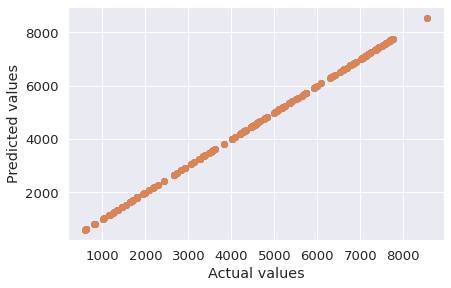

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions

# poly = SVR(kernel='poly',C=100,degree=2).fit(X,y)
# sigmoid = SVR(kernel='sigmoid',C=1,gamma=0.1).fit(X,y)


# Fit the SVR model with Linear kernels
linear = SVR(kernel='linear',C=100).fit(X_train,y_train)

# Plot the actual target values against the predicted values
plt.scatter(y_test, linear.predict(X_test))
plt.scatter(y_test,y_test)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

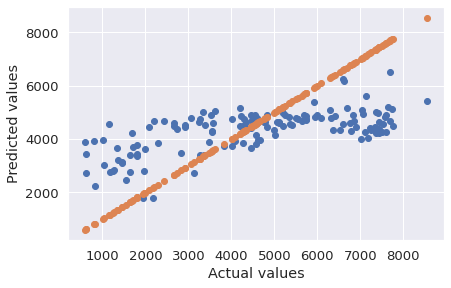

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions

# sigmoid = SVR(kernel='sigmoid',C=1,gamma=0.1).fit(X,y)


# Fit the SVR model with poly kernels
poly = SVR(kernel='poly',C=100,degree=2).fit(X_train,y_train)

# Plot the actual target values against the predicted values
plt.scatter(y_test, poly.predict(X_test))
plt.scatter(y_test,y_test)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

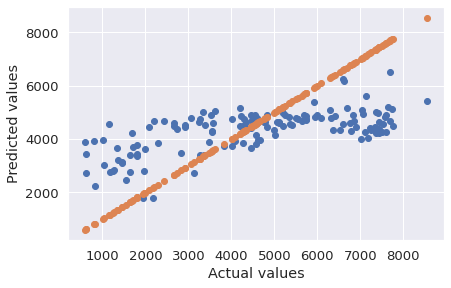

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions



# Fit the SVR model with poly kernels
sigmoid = SVR(kernel='sigmoid',C=1,gamma=0.1).fit(X_train,y_train)

# Plot the actual target values against the predicted values
plt.scatter(y_test, poly.predict(X_test))
plt.scatter(y_test,y_test)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)